# Global value chains: a networks approach
### Katrina Walker, Frank Fanteev, David Rosenfeld

## Introduction

An increasingly important feature of global trade and economics since the 1980s has been the breaking up of production processes into what is known as Global Value Chains (GVCs), in part due to an increased ease of communication and coordination between different locations enabled by new telecommunication and internet technologies (Baldwin, 2016). The increasing global interconnections generated by that process has also increased the vulnerability of the global economic system to contagion of economic shocks. 

As such, understanding the nature of economic interconnections within these global value chains has become a priority area of research for governments and policy research institutions. In particular, the OECD has developed Inter-Country Input-Output (ICIO) tables, and indicators of Trade in Value Added (TiVA) which have improved our understanding of GVCs.

We will use the OECD's ICIO data in a network setting to analyse the GVCs, and specifically use community-detection algorithms to analyse the extent to which GVCs have evolved between 1995 and 2011.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [3]:
# Import the input-output table, with multi-indices for both index and columns: one for country, another for sector
input_output = pd.read_csv("input_output.csv", index_col = [0,1], header = [0,1])

In [4]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()

        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result 

In [5]:
input_output_norm = normalize(input_output)
input_output_norm[input_output_norm<0.01] = 0

where_NaN = np.isnan(input_output_norm)
input_output_norm[where_NaN] = 0

In [6]:
#make a filter for several countries

In [7]:
smpl_cntrs = ['FRA','GBR']

In [8]:
input_output_norm[:10]


country                 ARG                                                    \
sector            C01T05AGR C10T14MIN C15T16FOD C17T19TEX    C20WOD C21T22PAP   
country sector                                                                  
ARG     C01T05AGR  1.000000  0.000000  1.000000  0.345329  1.000000  0.050761   
        C10T14MIN  0.000000  1.000000  0.000000  0.000000  0.011126  0.016406   
        C15T16FOD  0.153824  0.000000  0.381913  0.027060  0.039438  0.028339   
        C17T19TEX  0.021173  0.020064  0.013202  1.000000  0.042405  0.028049   
        C20WOD     0.034988  0.000000  0.000000  0.000000  0.859913  0.000000   
        C21T22PAP  0.000000  0.012447  0.058742  0.037428  0.048075  1.000000   
        C23PET     0.268994  0.033624  0.019448  0.023782  0.140916  0.027767   
        C24CHM     0.260017  0.033835  0.034412  0.204741  0.173580  0.197931   
        C25RBP     0.082999  0.023712  0.051796  0.047614  0.068605  0.102207   
        C26NMM     0.000000  0.031207  0.017087  0.000000  0.024997  0.045845   

country                                                    ...         ZAF  \
sector               C23PET    C24CHM    C25RBP    C26NMM  ...   C65T67FIN   
country sector                                             ...               
ARG     C01T05AGR  0.000000  0.000000  0.026309  0.000000  ...         0.0   
        C10T14MIN  1.000000  0.110004  0.000000  0.448413  ...         0.0   
        C15T16FOD  0.000000  0.120761  0.015579  0.065991  ...         0.0   
        C17T19TEX  0.000000  0.031122  0.048432  0.034640  ...         0.0   
        C20WOD     0.000000  0.000000  0.000000  0.024201  ...         0.0   
        C21T22PAP  0.000000  0.092583  0.034622  0.184189  ...         0.0   
        C23PET     0.054553  0.139738  0.141585  0.257164  ...         0.0   
        C24CHM     0.035328  1.000000  1.000000  0.256554  ...         0.0   
        C25RBP     0.000000  0.333045  0.229909  0.093836  ...         0.0   
        C26NMM     0.000000  0.027017  0.000000  1.000000  ...         0.0   

country                                                                \
sector            C70REA C71RMQ C72ITS C73T74OBZ C75GOV C80EDU C85HTH   
country sector                                                          
ARG     C01T05AGR    0.0    0.0    0.0       0.0    0.0    0.0    0.0   
        C10T14MIN    0.0    0.0    0.0       0.0    0.0    0.0    0.0   
        C15T16FOD    0.0    0.0    0.0       0.0    0.0    0.0    0.0   
        C17T19TEX    0.0    0.0    0.0       0.0    0.0    0.0    0.0   
        C20WOD       0.0    0.0    0.0       0.0    0.0    0.0    0.0   
        C21T22PAP    0.0    0.0    0.0       0.0    0.0    0.0    0.0   
        C23PET       0.0    0.0    0.0       0.0    0.0    0.0    0.0   
        C24CHM       0.0    0.0    0.0       0.0    0.0    0.0    0.0   
        C25RBP       0.0    0.0    0.0       0.0    0.0    0.0    0.0   
        C26NMM       0.0    0.0    0.0       0.0    0.0    0.0    0.0   

country                             
sector            C90T93OTS C95PVH  
country sector                      
ARG     C01T05AGR       0.0    0.0  
        C10T14MIN       0.0    0.0  
        C15T16FOD       0.0    0.0  
        C17T19TEX       0.0    0.0  
        C20WOD          0.0    0.0  
        C21T22PAP       0.0    0.0  
        C23PET          0.0    0.0  
        C24CHM          0.0    0.0  
        C25RBP          0.0    0.0  
        C26NMM          0.0    0.0  

[10 rows x 2176 columns]

//anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
//anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
//anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
//anaconda/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


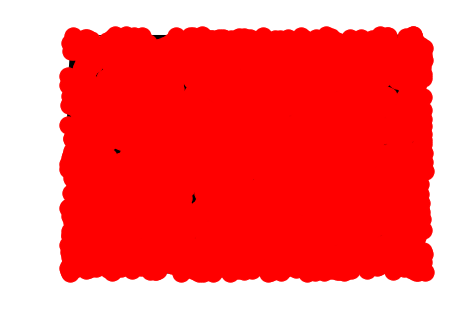

In [9]:
input_output_matrix = input_output_norm.as_matrix()

G = nx.from_numpy_matrix(input_output_matrix)

nx.draw(G)

plt.show()

In [34]:
input_output_matrix[:]

array([[ 1.        ,  0.        ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.15382354,  0.        ,  0.38191309, ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.03724864,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.02981716,
         0.22579774,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [37]:
input_output_norm

country                  ARG                                          \
sector             C01T05AGR C10T14MIN C15T16FOD C17T19TEX    C20WOD   
country sector                                                         
ARG     C01T05AGR   1.000000  0.000000  1.000000  0.345329  1.000000   
        C10T14MIN   0.000000  1.000000  0.000000  0.000000  0.011126   
        C15T16FOD   0.153824  0.000000  0.381913  0.027060  0.039438   
        C17T19TEX   0.021173  0.020064  0.013202  1.000000  0.042405   
        C20WOD      0.034988  0.000000  0.000000  0.000000  0.859913   
        C21T22PAP   0.000000  0.012447  0.058742  0.037428  0.048075   
        C23PET      0.268994  0.033624  0.019448  0.023782  0.140916   
        C24CHM      0.260017  0.033835  0.034412  0.204741  0.173580   
        C25RBP      0.082999  0.023712  0.051796  0.047614  0.068605   
        C26NMM      0.000000  0.031207  0.017087  0.000000  0.024997   
        C27MET      0.010024  0.092048  0.000000  0.000000  0.051513   
        C28FBM      0.010152  0.018684  0.017650  0.021160  0.093947   
        C29MEQ      0.000000  0.013349  0.000000  0.011374  0.034518   
        C30T33XCEQ  0.000000  0.000000  0.000000  0.000000  0.000000   
        C31ELQ      0.000000  0.000000  0.000000  0.000000  0.010376   
        C34MTR      0.011737  0.023233  0.010055  0.019874  0.045684   
        C35TRQ      0.000000  0.000000  0.000000  0.000000  0.000000   
        C36T37OTM   0.000000  0.046424  0.000000  0.024872  0.017694   
        C40T41EGW   0.014924  0.092486  0.064970  0.096081  0.232961   
        C45CON      0.000000  0.057449  0.011130  0.015203  0.042872   
        C50T52WRT   0.392885  0.127911  0.279333  0.474986  0.559579   
        C55HTR      0.028726  0.000000  0.013398  0.038168  0.077695   
        C60T63TRN   0.502111  0.444953  0.145706  0.123072  0.583022   
        C64PTL      0.021197  0.055826  0.022565  0.035874  0.096747   
        C65T67FIN   0.076123  0.059333  0.018022  0.042765  0.097530   
        C70REA      0.000000  0.000000  0.000000  0.000000  0.000000   
        C71RMQ      0.000000  0.032385  0.000000  0.018867  0.022806   
        C72ITS      0.015221  0.000000  0.014080  0.026553  0.031576   
        C73T74OBZ   0.022592  0.068754  0.122538  0.287976  0.225415   
        C75GOV      0.019394  0.012293  0.000000  0.000000  0.021744   
...                      ...       ...       ...       ...       ...   
ZAF     C20WOD      0.000000  0.000000  0.000000  0.000000  0.000000   
        C21T22PAP   0.000000  0.000000  0.000000  0.000000  0.000000   
        C23PET      0.000000  0.000000  0.000000  0.000000  0.000000   
        C24CHM      0.000000  0.000000  0.000000  0.000000  0.000000   
        C25RBP      0.000000  0.000000  0.000000  0.000000  0.000000   
        C26NMM      0.000000  0.000000  0.000000  0.000000  0.000000   
        C27MET      0.000000  0.000000  0.000000  0.000000  0.000000   
        C28FBM      0.000000  0.000000  0.000000  0.000000  0.000000   
        C29MEQ      0.000000  0.000000  0.000000  0.000000  0.000000   
        C30T33XCEQ  0.000000  0.000000  0.000000  0.000000  0.000000   
        C31ELQ      0.000000  0.000000  0.000000  0.000000  0.000000   
        C34MTR      0.000000  0.000000  0.000000  0.000000  0.000000   
        C35TRQ      0.000000  0.000000  0.000000  0.000000  0.000000   
        C36T37OTM   0.000000  0.000000  0.000000  0.000000  0.000000   
        C40T41EGW   0.000000  0.000000  0.000000  0.000000  0.000000   
        C45CON      0.000000  0.000000  0.000000  0.000000  0.000000   
        C50T52WRT   0.000000  0.000000  0.000000  0.000000  0.000000   
        C55HTR      0.000000  0.000000  0.000000  0.000000  0.000000   
        C60T63TRN   0.000000  0.000000  0.000000  0.000000  0.000000   
        C64PTL      0.000000  0.000000  0.000000  0.000000  0.000000   
        C65T67FIN   0.000000  0.000000  0.000000  0.000000  0.000000   
        C70REA      0.000000  0.000000  

In [13]:
import csv
with open('inputoutput.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=' ',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)

In [14]:
#filter input_output by index, extract 

